In [1]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from numpy import mean
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

## DEMOGRAPHIC DATA

In [2]:
dem24 = pd.read_csv('./dem24.csv')

Y24 = dem24['aki_flag'] #all rows of 'aki_flag' as LABELS
X24 = dem24.iloc[:,2:]  #features

#TRANSFORM CATEGORICAL ATTRIBUTES INTO 0-1 VECTORS
X24 = pd.get_dummies(X24)

#NORMALIZATION WITH MIN-MAX SCALER 0-1
scaler = MinMaxScaler()
X24 = scaler.fit_transform(X24)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train24, X_test24, y_train24, y_test24 = tts(X24, Y24, test_size=0.3, random_state=42)

In [3]:
dem48 = pd.read_csv('./dem48.csv')

Y48 = dem48['aki_flag'] #all rows of 'aki_flag' as LABELS
X48 = dem48.iloc[:,2:]  #features

#TRANSFORM CATEGORICAL ATTRIBUTES INTO 0-1 VECTORS
X48 = pd.get_dummies(X48)

#NORMALIZATION WITH MIN-MAX SCALER 0-1
X48 = scaler.fit_transform(X48)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train48, X_test48, y_train48, y_test48 = tts(X48, Y48, test_size=0.3, random_state=42)

In [4]:
#APPLY THE SMOTE TOMEK-LINKS TECHNIQUE TO COPE WITH CLASS IMBALANCE PROBLEM 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#DEFINE THE PARAMETERS TO BE TESTED IN THE GRID SEARCH
params = [
  {'learning_rate':[0.1,0.05,0.01,1,0.5,0.25, 0.75], 'max_depth' :[1,2,3,4,5], 'n_estimators':[100,250,500]}
] 

In [6]:
gs24 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p24 = Pipeline(steps=[('r', resample), ('gs', gs24)])

gs48 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p48 = Pipeline(steps=[('r', resample), ('gs', gs48)])

Now fit the grid search and extract the best parameters/estimator to be used fro the prediction 

In [6]:
gs24.fit(X_train24, y_train24)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   5.9s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   6.2s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   5.8s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   6.3s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=   5.7s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total time=  13.9s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total time=  13.0s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.706 total time=  15.8s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total time=  16.1s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.705 total time=  27.5s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.706 total time=  27.7s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.705 total time=  28.8s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.705 total time=  28.1s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   8.4s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   8.2s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   8.2s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   8.5s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=   8.4s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.704 total time=  20.3s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.705 total time=  16.1s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.705 total time=  19.1s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.705 total time=  17.7s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  40.1s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  40.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  36.1s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  50.5s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.705 total time=  37.5s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.706 total time=  13.4s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.706 total time=  15.8s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.691 total time=   9.7s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.693 total time=  26.9s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.692 total time=  24.2s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.691 total time=  26.2s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.679 total time=  22.7s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.686 total time=  22.2s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.691 total time=  49.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.686 total time=  46.3s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.692 total time=  43.1s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.677 total time=  48.3s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.688 total time=   9.1s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.684 total time=   8.9s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.691 total time=   9.2s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.688 total time=  24.1s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.692 total time=  22.1s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.695 total time=  20.6s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.679 total time=  21.0s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.679 total time=  20.6s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.681 total time=  41.3s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.688 total time=  41.8s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.676 total time=  40.8s
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.683 total time=  40.7s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.693 total time=   9.9s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.698 total time=   9.9s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.697 total time=  10.3s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.687 total time=   9.4s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.695 total time=   9.9s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.689 total time=  24.0s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.691 total time=  24.1s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.693 total time=  24.6s
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.676 total time=  17.8s
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.682 total time=  35.6s
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.690 total time=  35.4s
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.682 total time=  35.9s
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.674 total time=  35.5s
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.682 total time=  36.4s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [7]:
print("The best parameters found for the 24h DCW:")
print(gs24.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 24h DCW:")
print(gs24.best_estimator_)

The best parameters found for the 24h DCW:
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}
The best estimator found for the 24h DCW:
GradientBoostingClassifier(learning_rate=0.05, max_depth=1)


In [8]:
gs48.fit(X_train48, y_train48)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.4s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.762 total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.763 total time=   1.3s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.764 total time=   1.3s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   3.3s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.762 total time=   3.3s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.763 total time=   3.3s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total time=   3.3s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.764 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.762 total time=   6.5s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.763 total time=   6.5s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=   6.5s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.764 total time=   6.4s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   1.9s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.762 total time=   1.9s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.761 total time=   1.9s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   1.9s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   1.9s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.764 total time=   4.7s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.761 total time=   4.6s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.764 total time=   4.7s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.764 total time=   4.6s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=   9.4s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.762 total time=   9.4s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.761 total time=   9.3s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=   9.4s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.764 total time=   9.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=   2.5s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=   2.4s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.755 total time=   2.5s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.728 total time=   6.3s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.752 total time=   6.4s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.733 total time=   6.5s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.756 total time=   6.3s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.753 total time=   6.5s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.721 total time=  12.6s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.749 total time=  12.8s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.744 total time=  12.6s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.741 total time=  12.8s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.743 total time=   4.2s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.743 total time=   4.3s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.753 total time=   4.2s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.723 total time=  10.5s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.734 total time=  10.4s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.736 total time=  10.6s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.744 total time=  10.7s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.751 total time=  10.6s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.718 total time=  22.1s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.723 total time=  21.5s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.741 total time=  23.4s
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.754 total time=  21.4s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.740 total time=   5.0s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.748 total time=   4.9s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.743 total time=   4.8s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.745 total time=   4.9s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.756 total time=   4.8s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.729 total time=  12.0s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.743 total time=  12.5s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.734 total time=  11.9s
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.750 total time=   9.9s
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.726 total time=  19.7s
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.729 total time=  19.7s
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.739 total time=  20.2s
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.735 total time=  19.6s
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.750 total time=  20.5s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [9]:
print("The best parameters found for the 48h DCW:")
print(gs48.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 48h DCW:")
print(gs48.best_estimator_)

The best parameters found for the 48h DCW:
{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
The best estimator found for the 48h DCW:
GradientBoostingClassifier(learning_rate=0.01, max_depth=1)


In [5]:
best24 = GradientBoostingClassifier(learning_rate=0.05, max_depth=1)
best48 = GradientBoostingClassifier(learning_rate=0.01, max_depth=1)

In [11]:
y_pred24 = cross_val_predict(best24, X24, Y24, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.3s finished


In [12]:
y_pred48 = cross_val_predict(best48, X48, Y48, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.8s finished


In [13]:
#CLASSIFICATION REPORT 24H
print(classification_report(Y24, y_pred24))

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.70      1.00      0.83     10761
           1       0.00      0.00      0.00      4521

    accuracy                           0.70     15282
   macro avg       0.35      0.50      0.41     15282
weighted avg       0.50      0.70      0.58     15282



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print(accuracy_score(Y24, y_pred24))

0.704161758932077


In [15]:
print(precision_score(Y24, y_pred24))

0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(recall_score(Y24, y_pred24))

0.0


In [17]:
print(f1_score(Y24, y_pred24))

0.0


In [18]:
print(roc_auc_score(Y24, y_pred24))

0.5


In [19]:
#CLASSIFICATION REPORT 48H
print(classification_report(Y48, y_pred48))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6021
           1       0.00      0.00      0.00      1841

    accuracy                           0.77      7862
   macro avg       0.38      0.50      0.43      7862
weighted avg       0.59      0.77      0.66      7862



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(accuracy_score(Y48, y_pred48))

0.7658356652251336


In [21]:
print(precision_score(Y48, y_pred48))

0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(recall_score(Y48, y_pred48))

0.0


In [23]:
print(f1_score(Y48, y_pred48))

0.0


In [24]:
print(roc_auc_score(Y48, y_pred48))

0.5


Elapsed time to compute the importances: 0.057 seconds


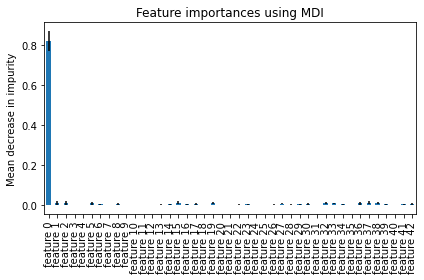

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#FEATURES SELECTION BASED ON THEIR IMPORTANCE WITH A RANDOM FOREST CLASSIFIER 
feature_names24 = [f'feature {i}' for i in range(X24.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train24, y_train24)

import time

start_time24 = time.time()
importances24 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time24 = time.time() - start_time24

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time24:.3f} seconds")

forest_importances24 = pd.Series(importances24, index=feature_names24)

fig, ax = plt.subplots()
forest_importances24.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [9]:
for i,v in enumerate(importances24):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.82049
Feature: 1, Score: 0.01109
Feature: 2, Score: 0.01122
Feature: 3, Score: 0.00101
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00804
Feature: 6, Score: 0.00368
Feature: 7, Score: 0.00087
Feature: 8, Score: 0.00656
Feature: 9, Score: 0.00081
Feature: 10, Score: 0.00116
Feature: 11, Score: 0.00038
Feature: 12, Score: 0.00103
Feature: 13, Score: 0.00274
Feature: 14, Score: 0.00336
Feature: 15, Score: 0.01280
Feature: 16, Score: 0.00406
Feature: 17, Score: 0.00499
Feature: 18, Score: 0.00075
Feature: 19, Score: 0.00823
Feature: 20, Score: 0.00039
Feature: 21, Score: 0.00042
Feature: 22, Score: 0.00197
Feature: 23, Score: 0.00314
Feature: 24, Score: 0.00110
Feature: 25, Score: 0.00037
Feature: 26, Score: 0.00170
Feature: 27, Score: 0.00768
Feature: 28, Score: 0.00273
Feature: 29, Score: 0.00454
Feature: 30, Score: 0.00542
Feature: 31, Score: 0.00040
Feature: 32, Score: 0.00838
Feature: 33, Score: 0.00788
Feature: 34, Score: 0.00462
Feature: 35, Score: 0.00126
Fe

Elapsed time to compute the importances: 0.053 seconds


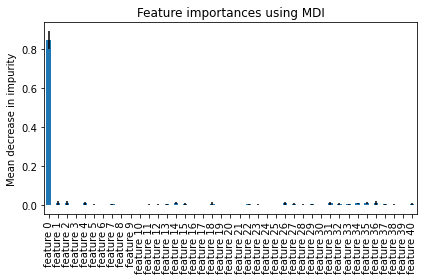

In [25]:
#DO IT FOR THE 48H DCW NOW
feature_names48 = [f'feature {i}' for i in range(X48.shape[1])]
#forest = RandomForestClassifier(random_state=0)
forest.fit(X_train48, y_train48)

start_time48 = time.time()
importances48 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time48 = time.time() - start_time48

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time48:.3f} seconds")

forest_importances48 = pd.Series(importances48, index=feature_names48)

fig, ax = plt.subplots()
forest_importances48.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [11]:
for i,v in enumerate(importances48):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.84543
Feature: 1, Score: 0.01144
Feature: 2, Score: 0.00999
Feature: 3, Score: 0.00048
Feature: 4, Score: 0.00799
Feature: 5, Score: 0.00271
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00446
Feature: 8, Score: 0.00063
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00127
Feature: 12, Score: 0.00232
Feature: 13, Score: 0.00325
Feature: 14, Score: 0.00996
Feature: 15, Score: 0.00686
Feature: 16, Score: 0.00163
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00761
Feature: 19, Score: 0.00126
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.00040
Feature: 22, Score: 0.00363
Feature: 23, Score: 0.00184
Feature: 24, Score: 0.00054
Feature: 25, Score: 0.00036
Feature: 26, Score: 0.00811
Feature: 27, Score: 0.00485
Feature: 28, Score: 0.00259
Feature: 29, Score: 0.00331
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00841
Feature: 32, Score: 0.00691
Feature: 33, Score: 0.00294
Feature: 34, Score: 0.00810
Feature: 35, Score: 0.00932
Fe

## Try to use the function cross_validate( ) now.

In [7]:
#DEFINE THE METRICS 
scoring=['accuracy','precision','recall', 'roc_auc', 'f1']

In [8]:
p24 = Pipeline(steps=[('r', resample), ('m', best24)])

scores24 = cross_validate(p24, X24, Y24, scoring = scoring, cv = 5)

In [12]:
scores24['test_accuracy'].mean()

0.4519737337875308

In [13]:
scores24['test_precision'].mean()

0.3114928488303216

In [14]:
scores24['test_recall'].mean()

0.7018060920158411

In [15]:
scores24['test_f1'].mean()

0.43044041126428

In [16]:
scores24['test_roc_auc'].mean()

0.5387150969005406

In [9]:
p48 = Pipeline(steps=[('r', resample), ('m', best48)])

scores48 = cross_validate(p48, X48, Y48, scoring = scoring, cv = 5)

In [17]:
scores48['test_accuracy'].mean()

0.3376957532405138

In [18]:
scores48['test_precision'].mean()

0.23987167209929067

In [19]:
scores48['test_recall'].mean()

0.8414427948627313

In [20]:
scores48['test_f1'].mean()

0.3728266075715385

In [21]:
scores48['test_roc_auc'].mean()

0.513102682566916